In [1]:
from utils import *
import os
from grid2op.utils import ScoreL2RPN2020
from CustomGymEnv import CustomGymEnv

### Parameters of the agents to evaluate

In [2]:
save_path = "./saved_model/safe_max_rho/"
ENV_NAME = "l2rpn_wcci_2022_dev_val"
SCOREUSED = ScoreL2RPN2020
gymenv_class = CustomGymEnv
verbose = True
p = Parameters()
p.LIMIT_INFEASIBLE_CURTAILMENT_STORAGE_ACTION = True # It causes errors during training
filter_chronics = None

train_args = {}
train_args["gymenv_kwargs"] = {"safe_max_rho": 0.7}

values_to_test = np.array([3e-5, 3e-4, 3e-3])
var_to_test = "learning_rate"

agents_names = [[d for d in os.listdir(save_path) if os.path.isdir(save_path + d)][0]]
agents_names

['GymEnvWithRecoWithDN_2022-04-08_19-15_learning_rate_0']

### Evaluation

Starts the evaluation of the agent
Start the evaluation of the scores
	:-) I survived 10 steps vs 7 for do nothing (3)
	:-( I survived 150 steps vs 156 for do nothing (-6)
	:-) I survived 713 steps vs 130 for do nothing (583)
	:-( I survived 136 steps vs 232 for do nothing (-96)
	:-) I survived 714 steps vs 384 for do nothing (330)
	:-) I survived 721 steps vs 384 for do nothing (337)
	:-) I survived 2017 steps vs 999 for do nothing (1018)
	:-) I survived 2017 steps vs 1271 for do nothing (746)
	:-) I survived 2017 steps vs 1561 for do nothing (456)
	:-) I survived 2017 steps vs 975 for do nothing (1042)
	:-) I survived 2017 steps vs 2017 for do nothing (0)
	:-) I survived 2017 steps vs 2017 for do nothing (0)
	:-) I survived 2017 steps vs 2017 for do nothing (0)
	:-) I survived 2017 steps vs 990 for do nothing (1027)
	:-) I survived 2017 steps vs 111 for do nothing (1906)
	:-) I survived 2017 steps vs 1871 for do nothing (146)
	:-) I survived 24 steps vs 24 for do nothing (0)
	:-) I s

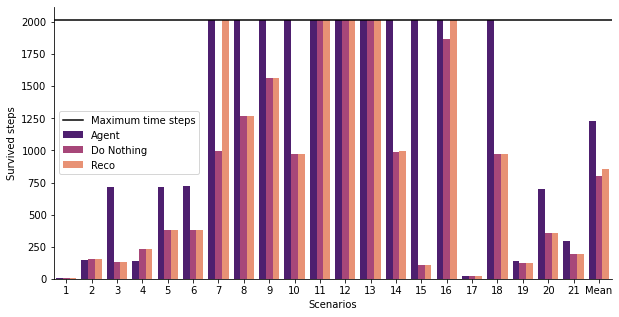

In [3]:
for i, agent_name in enumerate(agents_names):
  results = eval_agent(ENV_NAME,
            21,
            agent_name,
            save_path,
            SCOREUSED,
            gymenv_class,
            verbose,
            gymenv_kwargs=train_args["gymenv_kwargs"] if var_to_test!="gymenv_kwargs" else values_to_test[i],
            param=p,
            filter_fun=filter_chronics)
  create_bar_plot(*results)